In [1]:
import cmath
import matplotlib.pyplot as plt
import numpy as np

In [120]:
freq = np.linspace(25e9, 200e9, 100)
index = np.where(np.round(freq/1e9)==78)

In [325]:
er = 24
o = 0.02
e0 = 8.85e-12
u0 = 4*np.pi*10e-7
K = 1
ur = 1
s=0.03
d=0.004
l=0.29
f=1
psi = 1

In [326]:
C = er*e0*np.pi/(s/d)
G = o*np.pi/(s/d)
L = u0*ur/(np.pi*(s/d))
R = 1.66*K*np.sqrt(f)*10e-7/d


In [327]:
def reset():
    global C, G, R, L, dC, dR, dL, dG
    C = er*e0*np.pi/(s/d)
    G = o*np.pi/(s/d)
    L = u0*ur/(np.pi*(s/d))
    R = 1.66*K*np.sqrt(f)*10e-7/d
    dC = 1e-9
    dR = 50
    dL = 0.2
    dG = 0.0001
    
reset()
print(G)

0.008377580409572783


In [328]:
def z(C, G, R, L):
    gamma = np.sqrt(np.vectorize(complex)(R, freq*L)*np.vectorize(complex)(G, freq*C))
    z0 = np.sqrt(np.vectorize(complex)(R, freq*L)/np.vectorize(complex)(G, freq*C))
    zl = 1/(np.vectorize(complex)(psi*o, 2*np.pi*f*e0*er))
    return z0*(zl*np.cosh(gamma*l)+z0*np.sinh(gamma*l))/(zl*np.sinh(gamma*l)+z0*np.cosh(gamma*l))

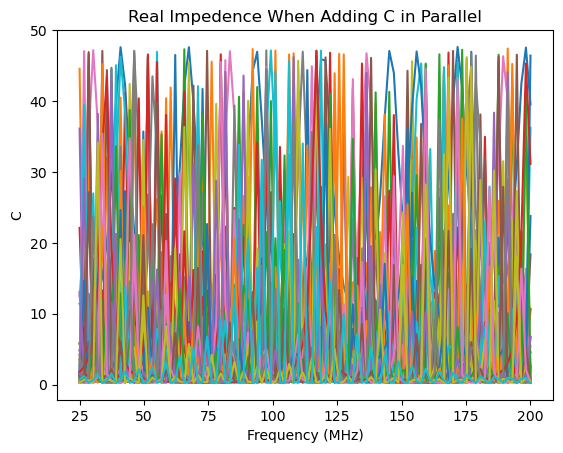

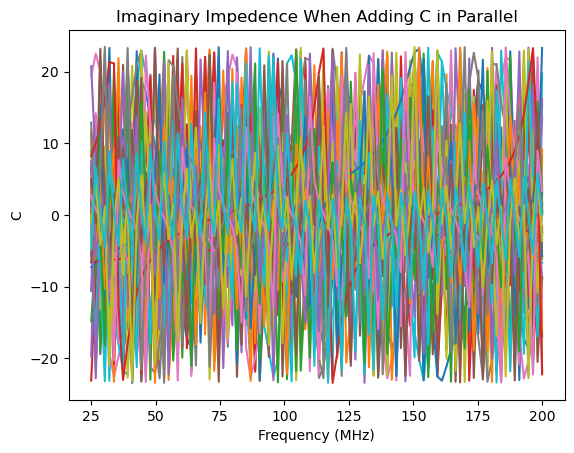

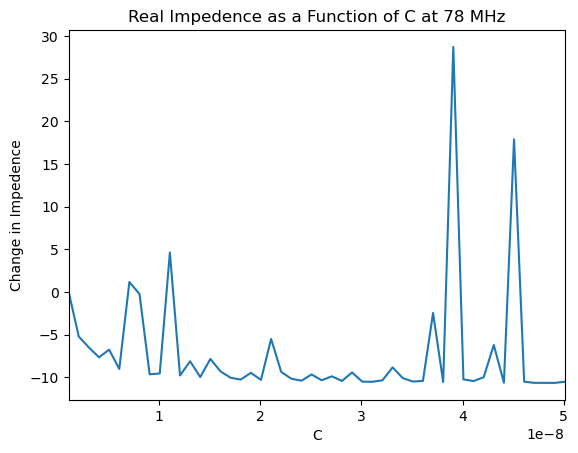

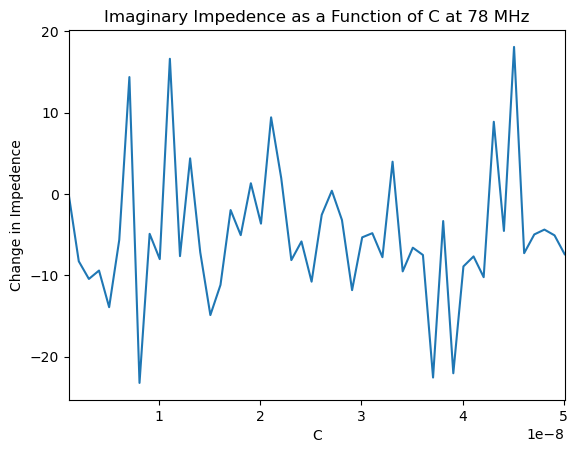

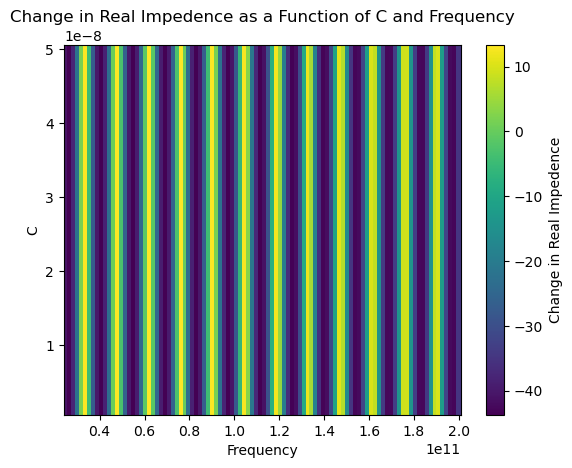

In [329]:
dC = 1e-9
dR = 50
dL = 0.2
dG = 0.5

def series(r1, r2):
    return r1+ r2

def parallel(r1, r2):
    return 1/(1/r1 + 1/r2)

def plots(which_var="R", numiter=50):
    global C, G, R, L, dC, dR, dL, dG
    reset()
    if which_var=="R":
        ch = R
        dch = dR
        add = parallel
        
    if which_var=="C":
        ch = C
        dch = dC
        add = series
        
    if which_var=="L":
        ch = L
        dch = dL
        add = parallel
        
    if which_var=="G":
        ch = G
        dch = dG
        add = series
        
    imp78 = []
    im78 = []
    r = []
    #plt.plot(freq, z(C, G, R, L))

    for i in range(numiter): 
        R = add(ch, (i+1)*dch) if which_var=="R" else R
        C = add(ch, (i+1)*dch) if which_var=="C" else C
        L = add(ch, (i+1)*dch) if which_var=="L" else L
        G = add(ch, (i+1)*dch) if which_var=="G" else G
        
        impedence = z(C, G, R, L)
        plt.plot(freq/1e9, impedence.real, label=f"R = {add(ch, (i+1)*dch)}")
        imp78.append(impedence.real[index])
        r.append(add(ch, (i+1)*dch))
        im78.append(impedence.imag[index])

    plt.title(f"Real Impedence When Adding {which_var} in Parallel")
    plt.xlabel("Frequency (MHz)")
    plt.ylabel(f"{which_var}")
    plt.show()
    reset()

    for i in range(numiter):
        R = add(ch, (i+1)*dch) if which_var=="R" else R
        C = add(ch, (i+1)*dch) if which_var=="C" else C
        L = add(ch, (i+1)*dch) if which_var=="L" else L
        G = add(ch, (i+1)*dch) if which_var=="G" else G
        impedence = z(C, G, R, L)
        plt.plot(freq/1e9, impedence.imag, label=f"R = {add(ch, (i+1)*dch)}")
        plt.xlabel("Frequency (MHz)")
        plt.ylabel(f"{which_var}")
        

    plt.title(f"Imaginary Impedence When Adding {which_var} in Parallel")
    plt.show()
    reset()

    plt.plot(r, imp78 - imp78[0], label="Real")
    plt.title(f"Real Impedence as a Function of {which_var} at 78 MHz")
    plt.xlim(min(r), max(r))
    plt.xlabel(f"{which_var}")
    plt.ylabel("Change in Impedence")
    # print(min(r))
    plt.show()
    plt.plot(r, im78 - im78[0], label="Imaginary")
    plt.xlim(min(r), max(r))
    plt.title(f"Imaginary Impedence as a Function of {which_var} at 78 MHz")
    plt.xlabel(f"{which_var}")
    plt.ylabel("Change in Impedence")
    plt.show()
    reset()
    
    imp = np.array([z(C, G, r[i], L) for i in range(len(r))])
    xx, yy = np.meshgrid(freq, r)
    # print(xx.shape, imp.shape)
    plt.title(f"Change in Real Impedence as a Function of {which_var} and Frequency")
    plt.pcolor(xx, yy, imp.real - z(C, G, r[0], L)[index].real)
    plt.xlabel("Frequency")
    plt.ylabel(f"{which_var}")
    cbar = plt.colorbar()
    cbar.set_label("Change in Real Impedence")
    # print(max(r))
    # print(R)
    # print(imp[:,30:].shape)
    plt.show()

plots(which_var="C", numiter=50)

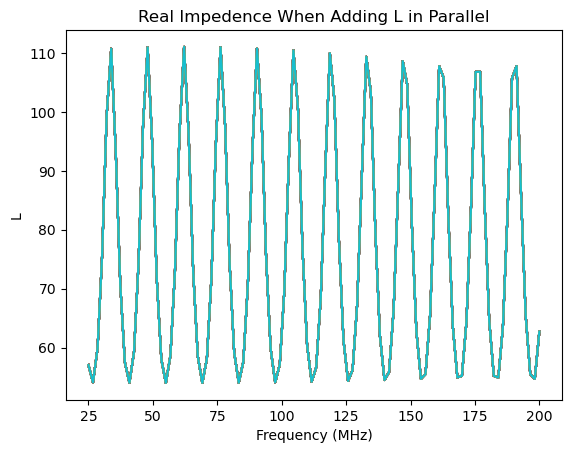

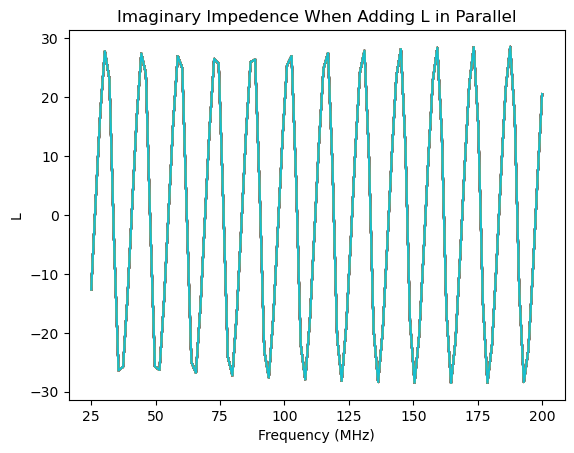

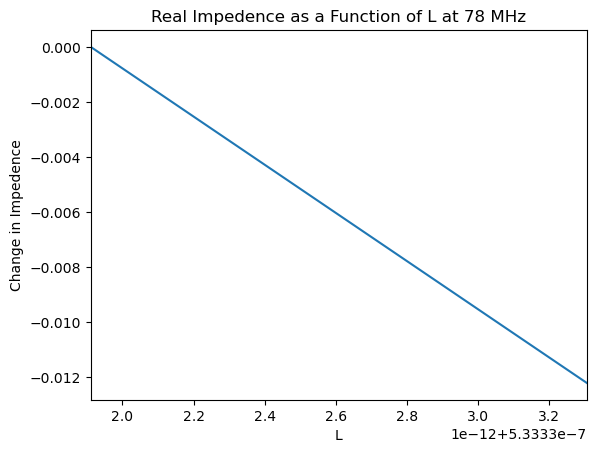

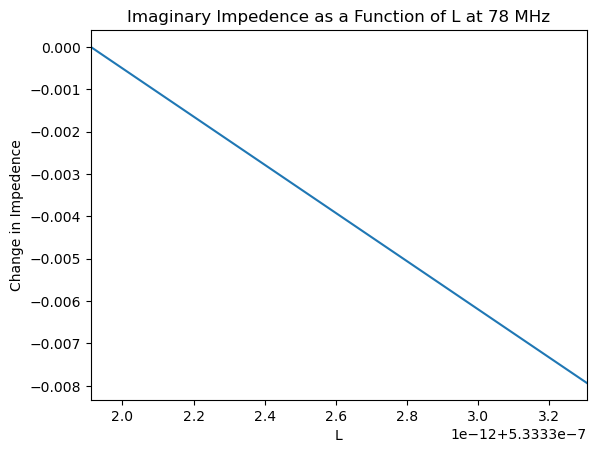

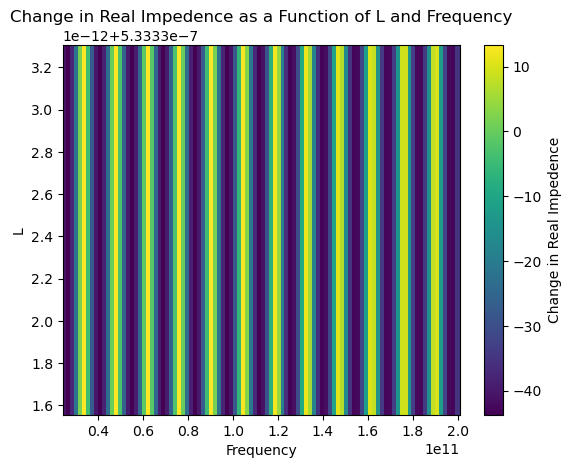

In [330]:
plots(which_var="L", numiter=50)

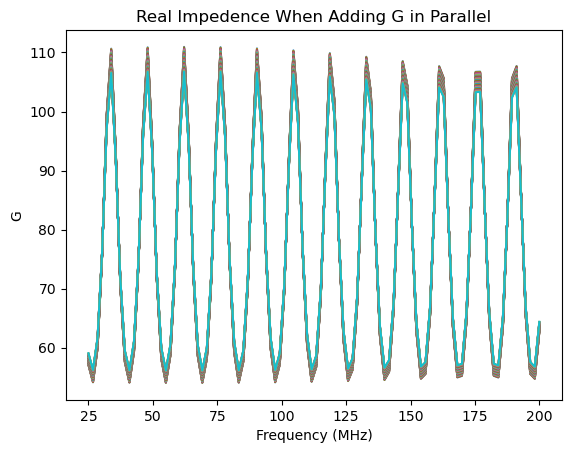

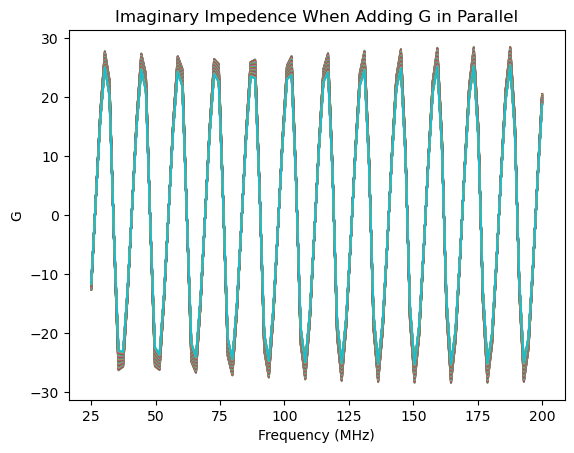

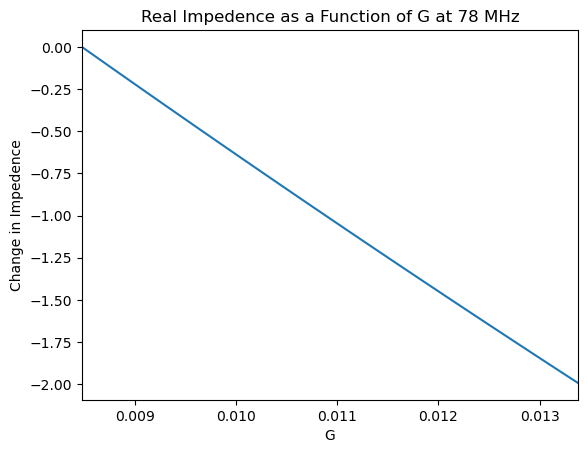

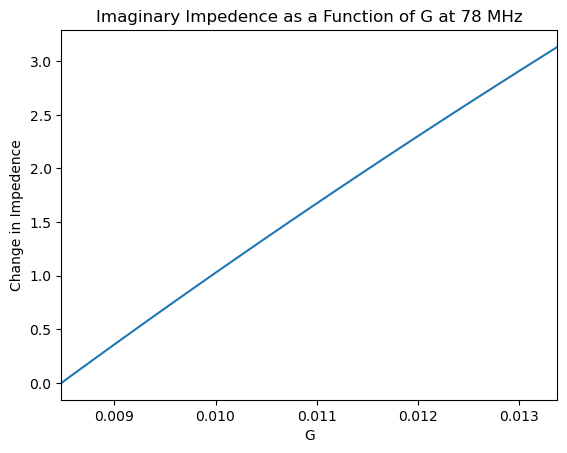

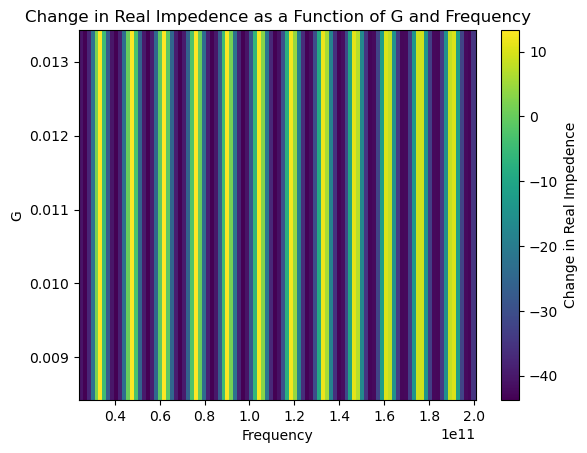

In [331]:
plots(which_var="G", numiter=50)

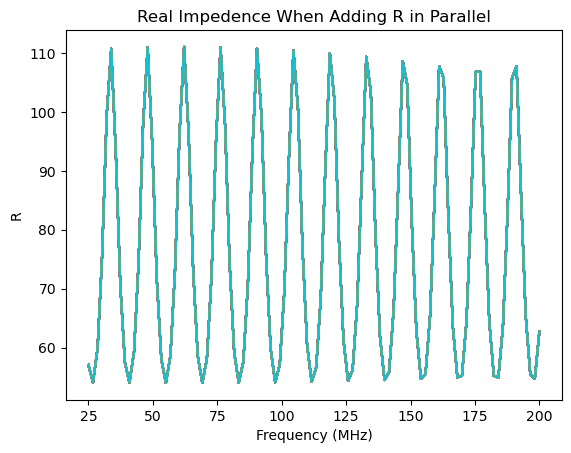

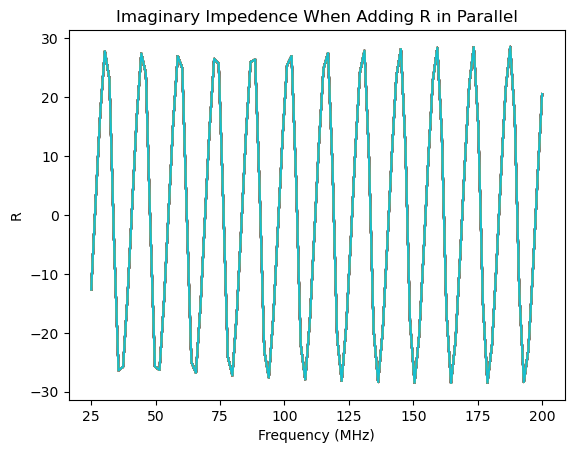

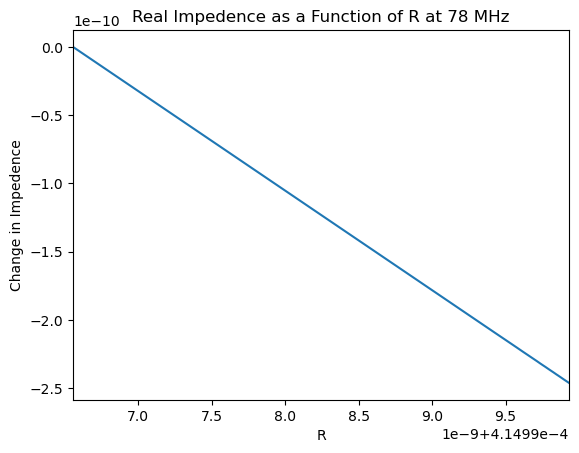

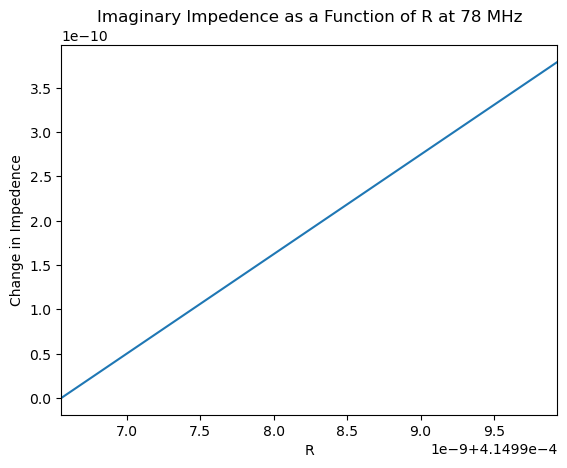

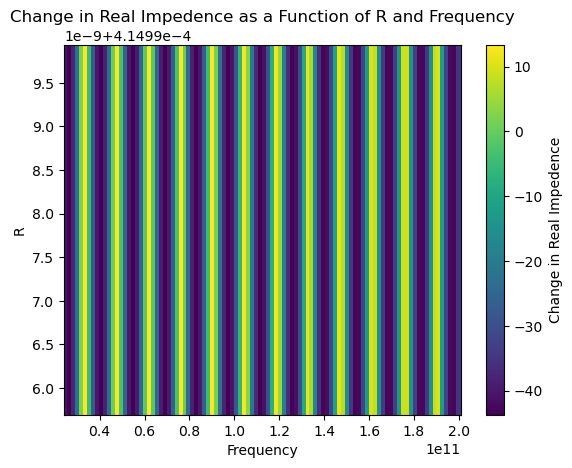

In [332]:
plots(which_var="R", numiter=50)

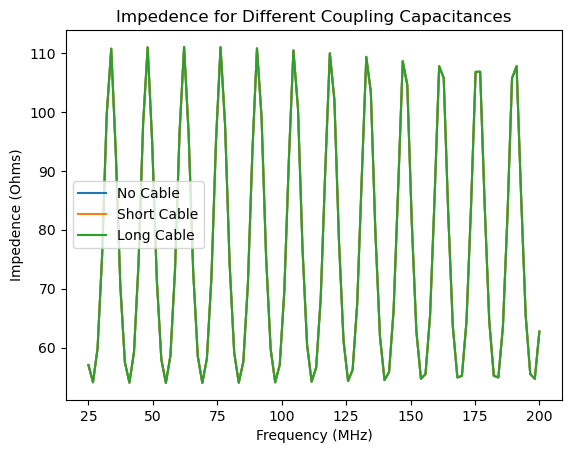

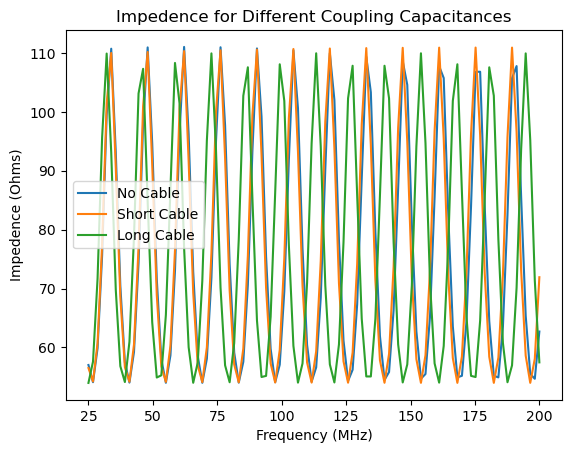

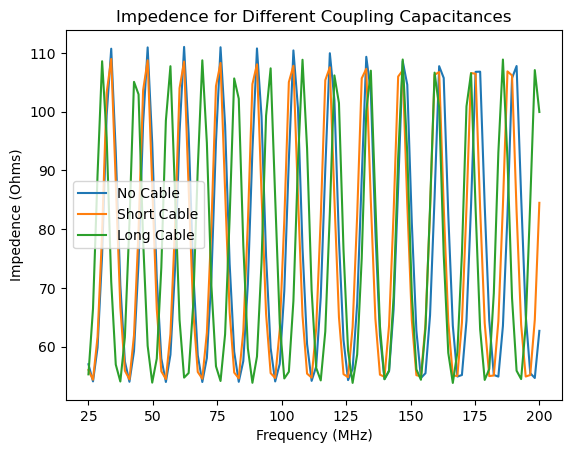

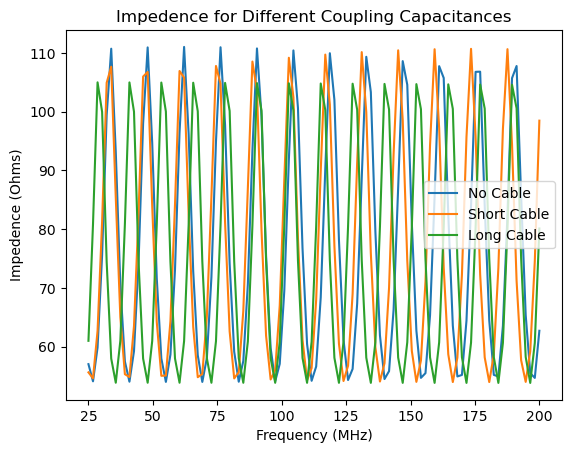

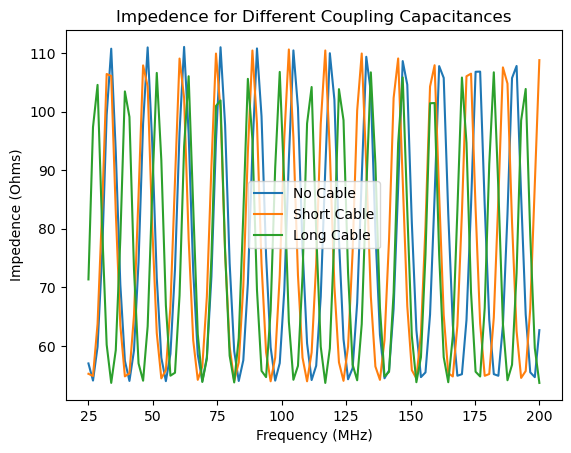

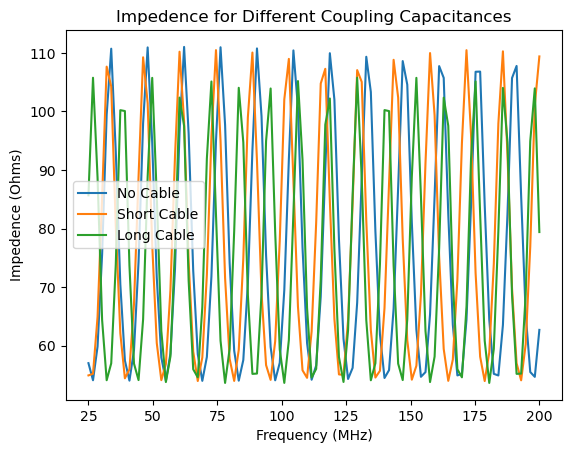

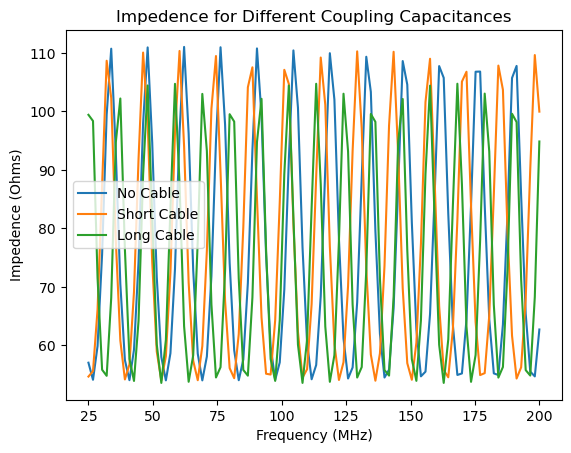

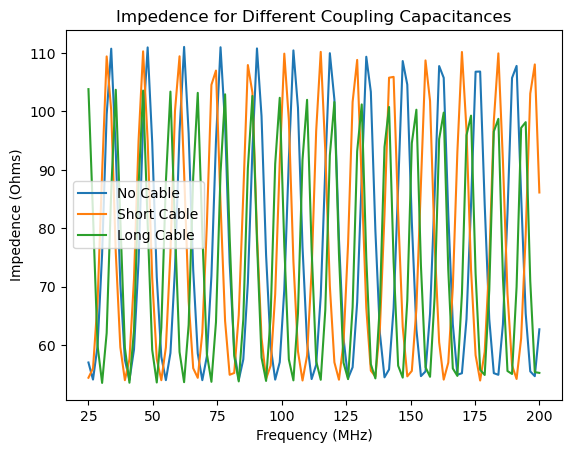

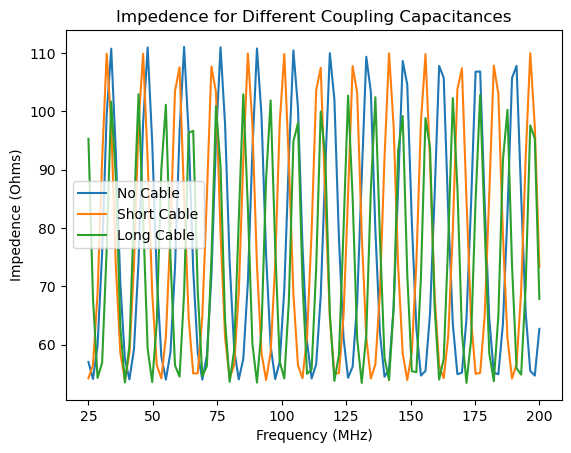

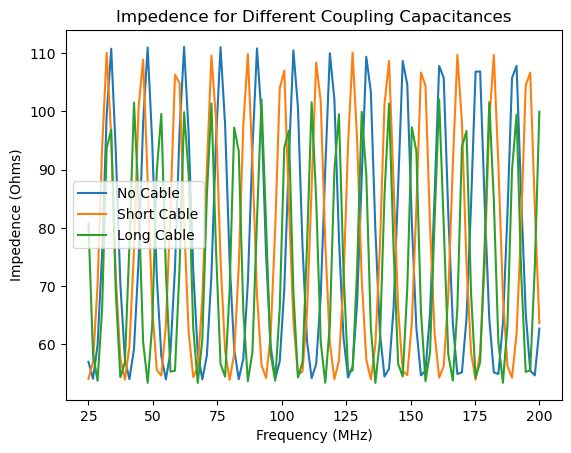

In [354]:
# So this clearly probably doesn't help anyone but did help me understand stuff. 
# Seeing if we can reproduce Ian's results by adding a capacitance in parallel (to account for capacitative coupling?).

dc = 0

#C = series(dc, 2*1e-10)

for i in range(10):
    
    lenratio = 10
    # C = 0.05e-7

    # print(C)
    impedence = z(C, G, R, L)
    plt.plot(freq/1e9, impedence.real, label="No Cable")
    reset()

    C = series(C, dc)
    # print(C)
    impedence = z(C, G, R, L)
    plt.plot(freq/1e9, impedence.real, label="Short Cable")
    reset()

    C = series(C, dc*lenratio)
    # print(C)
    impedence = z(C, G, R, L)
    plt.plot(freq/1e9, impedence.real, label="Long Cable")
    reset()
    
    dc +=1e-13
    plt.legend()
    # plt.xlim(70, 150)
    plt.title("Impedence for Different Coupling Capacitances")
    plt.ylabel("Impedence (Ohms)")
    plt.xlabel("Frequency (MHz)")
    plt.show()

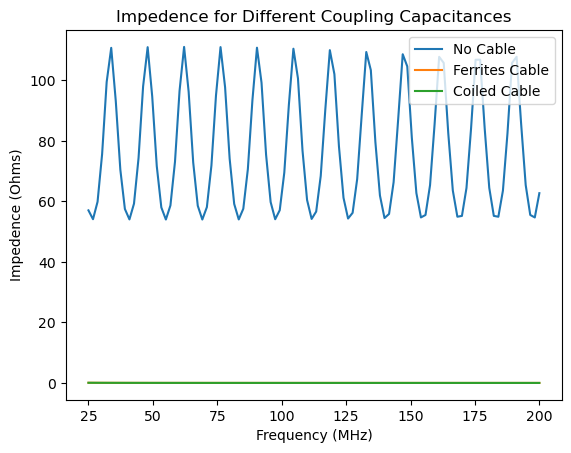

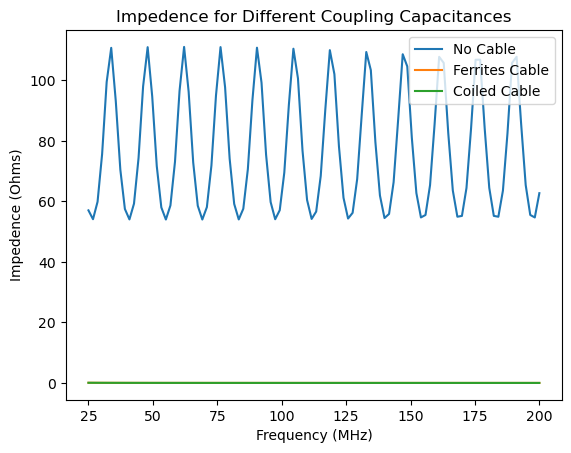

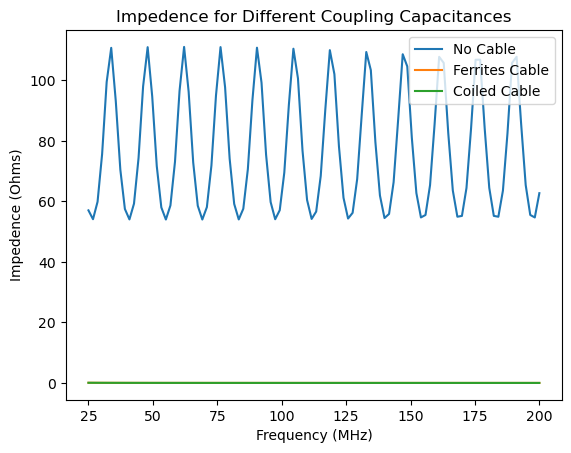

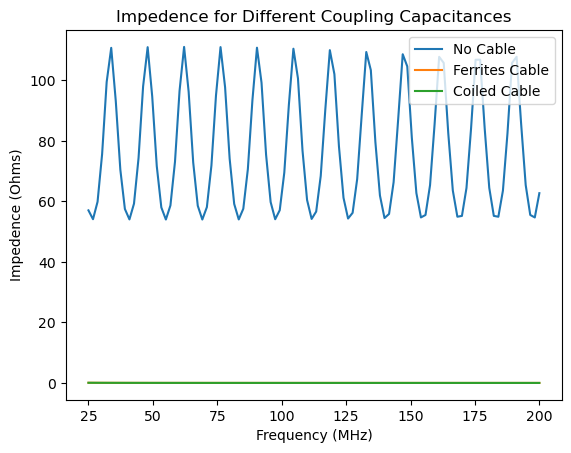

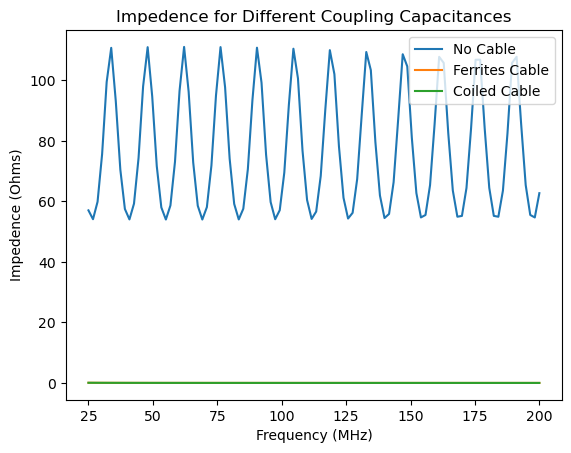

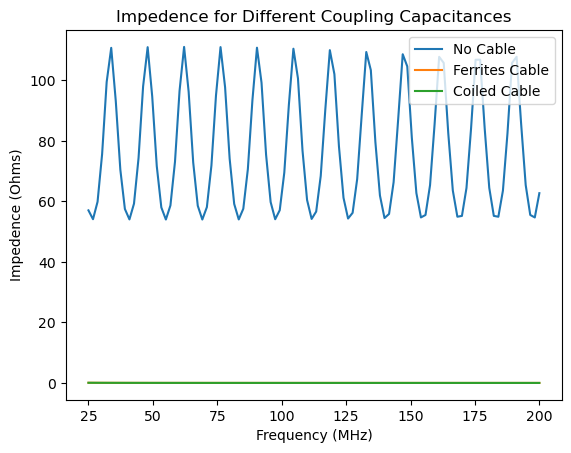

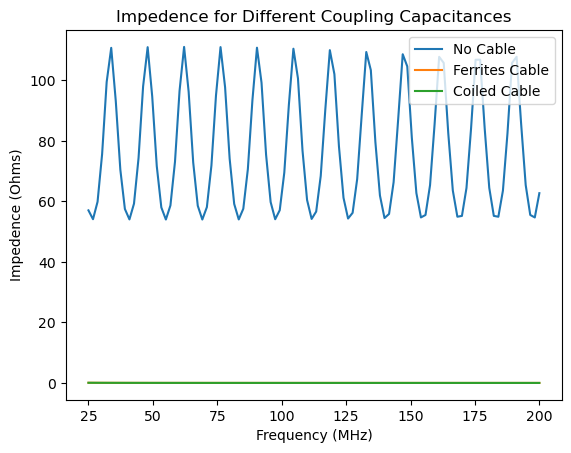

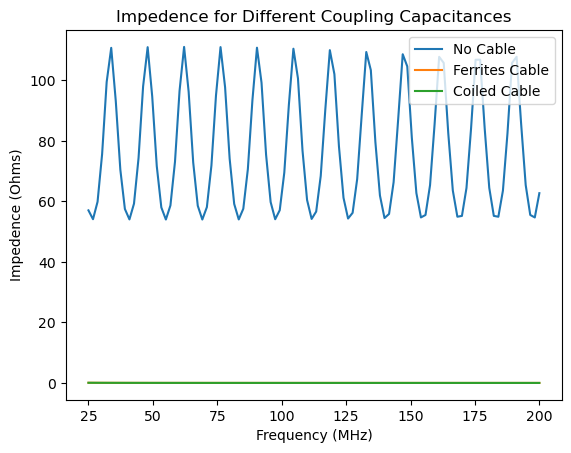

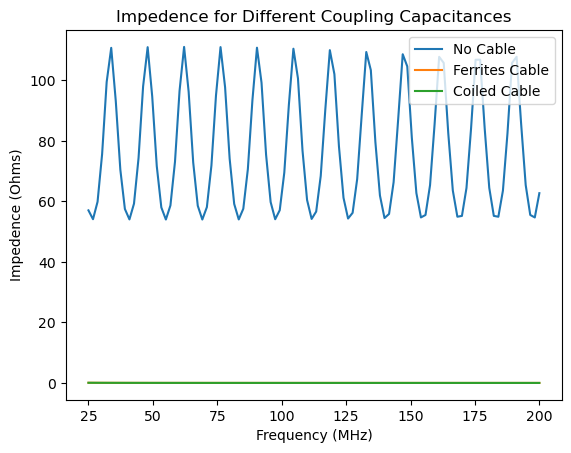

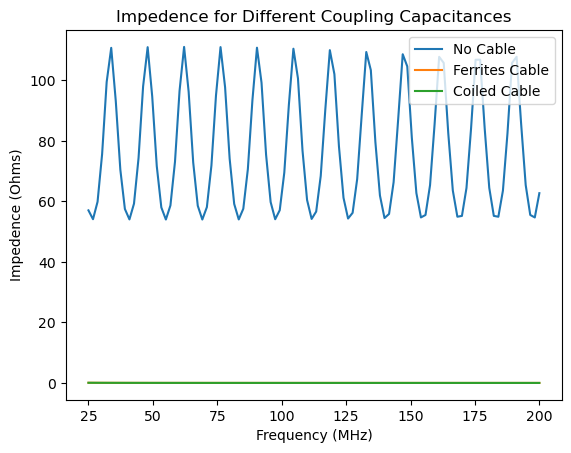

In [360]:
# So unless I fit for this there is no way I'll find parameters that reproduce Ian's data. 
# Looking at the changes in capacitance is enough to convince me that coupling could 
# be repsonsible.


# I feel like there will be an inductance term for the coiled cable 
# and an inductance + resistance term for the ferrites but irdk anything lmao 
# (from this?: https://www.analog.com/media/en/technical-documentation/application-notes/an-1368.pdf

# So this clearly probably doesn't help anyone but did help me understand stuff. 
# Seeing if we can reproduce Ian's results by adding a capacitance in parallel (to account for capacitative coupling?).

dc = 0
dl = 0
dr = 0
#C = series(dc, 2*1e-10)

for i in range(10):
    dl +=1e-19
    dr += 0.005
    
    lenratio = 10
    # C = 0.05e-7

    # print(C)
    impedence = z(C, G, R, L)
    plt.plot(freq/1e9, impedence.real, label="No Cable")
    reset()

    R = parallel(R, dr)
    L = parallel(L, dl)
    # print(C)
    impedence = z(C, G, R, L)
    plt.plot(freq/1e9, impedence.real, label="Ferrites Cable")
    reset()

    L = parallel(L, dl)
    # print(C)
    impedence = z(C, G, R, L)
    plt.plot(freq/1e9, impedence.real, label="Coiled Cable")
    reset()
    

    plt.legend()
    # plt.xlim(70, 150)
    plt.title("Impedence for Different Coupling Capacitances")
    plt.ylabel("Impedence (Ohms)")
    plt.xlabel("Frequency (MHz)")
    plt.show()